In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path= '/content/drive/MyDrive/train/'

In [ ]:
import os
real_images= os.listdir(path)[0:200]

In [ ]:
len(real_images)

200

In [ ]:
import cv2
import numpy as np

# Define image size
image_size = (64, 64)

preprocessed_images = []

# Load and preprocess images
for image_file in real_images :
    # Load image
    image = cv2.imread(path+
    image_file)

    # Resize image
    image = cv2.resize(image, image_size)

    # Normalize pixel values
    image = image / 255.0
    image = image - 0.5
    image = image * 2.0

    # Add image to the list
    preprocessed_images.append(image)

# Convert the list to a NumPy array
preprocessed_images = np.array(preprocessed_images)
flattened_images=preprocessed_images.reshape(-1, 12288)


In [ ]:
preprocessed_images

array([[[[ 0.70196078,  0.84313725,  0.70980392],
         [ 0.51372549,  0.70980392,  0.60784314],
         [ 0.49019608,  0.70196078,  0.63137255],
         ...,
         [-0.23137255, -0.06666667, -0.05098039],
         [-0.34117647, -0.20784314, -0.18431373],
         [-0.58431373, -0.43529412, -0.48235294]],

        [[ 0.61568627,  0.75686275,  0.62352941],
         [ 0.52156863,  0.7254902 ,  0.61568627],
         [ 0.52941176,  0.74117647,  0.67058824],
         ...,
         [-0.44313725, -0.23137255, -0.22352941],
         [-0.46666667, -0.28627451, -0.27058824],
         [-0.41960784, -0.23921569, -0.25490196]],

        [[ 0.46666667,  0.64705882,  0.58431373],
         [ 0.51372549,  0.69411765,  0.63137255],
         [ 0.52156863,  0.73333333,  0.65490196],
         ...,
         [-0.55294118, -0.36470588, -0.38039216],
         [-0.4745098 , -0.28627451, -0.30196078],
         [-0.48235294, -0.27843137, -0.30980392]],

        ...,

        [[-0.09019608,  0.0745098 ,  0

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Generator model
generator = keras.Sequential([
    layers.Dense(256, input_shape=(100,), activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(12288, activation='tanh'),  # Output layer with 12288 (3x64x64) units for a 64x64 RGB image
])

# Discriminator model
discriminator = keras.Sequential([
    layers.Dense(1024, input_shape=(12288,), activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Output layer with a single unit for binary classification
])

# Combined model (GAN)
gan = keras.Sequential([generator, discriminator])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=0.5))

# Compile GAN
discriminator.trainable = False  # Freeze the discriminator during GAN training
gan.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=0.5))

# Load real cat images dataset
# ...

# Training loop
batch_size = 32
epochs = 100

for epoch in range(epochs):
    for batch in range(len(flattened_images) // batch_size):
        # Train discriminator
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        fake_images = generator.predict(noise)
        real_batch = flattened_images[batch * batch_size : (batch + 1) * batch_size]

        # Labels for real and fake images
        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))

        discriminator_loss_real = discriminator.train_on_batch(real_batch, labels_real)
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, labels_fake)
        discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generator_loss = gan.train_on_batch(noise, labels_real)

        # Print training progress
        print(f"Epoch: {epoch+1}/{epochs}, Batch: {batch}/{len(real_images) // batch_size}, "
              f"Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generate new cat images

# Save generated cat images
# ...


1/1 [==============================] - 0s 423ms/step
Epoch: 1/100, Batch: 0/6, Discriminator Loss: 0.7483454346656799, Generator Loss: 0.6233937740325928
1/1 [==============================] - 0s 61ms/step
Epoch: 1/100, Batch: 1/6, Discriminator Loss: 1.501020594201691, Generator Loss: 0.383856862783432
1/1 [==============================] - 0s 100ms/step
Epoch: 1/100, Batch: 2/6, Discriminator Loss: 2.2609713580750395, Generator Loss: 3.192168712615967
1/1 [==============================] - 0s 103ms/step
Epoch: 1/100, Batch: 3/6, Discriminator Loss: 0.14801340596750379, Generator Loss: 4.41839599609375
1/1 [==============================] - 0s 61ms/step
Epoch: 1/100, Batch: 4/6, Discriminator Loss: 0.19897151898476295, Generator Loss: 2.947807788848877
1/1 [==============================] - 0s 56ms/step
Epoch: 1/100, Batch: 5/6, Discriminator Loss: 0.318275740952231, Generator Loss: 2.1355016231536865
1/1 [==============================] - 0s 99ms/step
Epoch: 2/100, Batch: 0/6, Discri

In [ ]:
noise = np.random.normal(0, 1, size=(400, 100))
generated_images = generator.predict(noise)


13/13 [==============================] - 1s 70ms/step


In [ ]:
len(generated_images)

400

In [ ]:
generated_images[1]

array([ 0.06682332, -0.05057115, -0.01398592, ..., -0.16630796,
        0.12554696, -0.08610539], dtype=float32)

In [ ]:
image_array=generated_images[1]

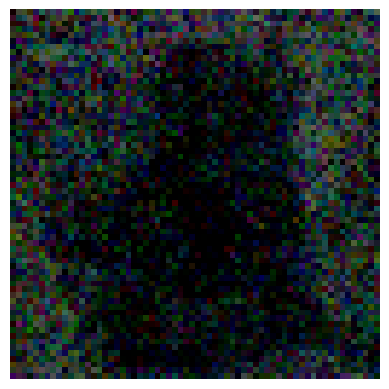

In [ ]:
import matplotlib.pyplot as plt
image = np.reshape(image_array, (64, 64, 3))  # Reshape to (height, width, channels)
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
image_rgb

array([[[121, 121, 121]],

       [[123, 123, 123]],

       [[112, 112, 112]],

       ...,

       [[132, 132, 132]],

       [[131, 131, 131]],

       [[132, 132, 132]]], dtype=uint8)